In [41]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [42]:
data1=pd.read_csv("./data/yfinance_data/AAPL_historical_data.csv")
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [43]:
data_news=pd.read_csv("./data/raw_analyst_ratings.csv")
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [44]:
data_news["Date"]=pd.to_datetime(data_news["date"], errors="coerce")


In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
SIA=SentimentIntensityAnalyzer()
data_news['sentiment'] = data_news['headline'].apply(lambda x: SIA.polarity_scores(text=x)['compound'])

In [47]:
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05 10:30:54-04:00,0.000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03 10:45:20-04:00,0.000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26 04:30:07-04:00,0.000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22 12:45:06-04:00,0.000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22 11:38:59-04:00,0.296


In [48]:
data_news["sentiment_cata"]=pd.cut(data_news["sentiment"], bins=[ -1,-0.25,0.25,1], labels=[ "negative", "nutral","postive"])

In [49]:
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05 10:30:54-04:00,0.000,nutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03 10:45:20-04:00,0.000,nutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26 04:30:07-04:00,0.000,nutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22 12:45:06-04:00,0.000,nutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22 11:38:59-04:00,0.296,postive


In [50]:
data_news.dtypes

Unnamed: 0                            int64
headline                             object
url                                  object
publisher                            object
date                                 object
stock                                object
Date              datetime64[ns, UTC-04:00]
sentiment                           float64
sentiment_cata                     category
dtype: object

In [51]:
data1.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [52]:
data1["Date_format"]=pd.to_datetime(data1["Date"],errors="coerce")

In [53]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Date_format
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,1980-12-12
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,1980-12-15
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,1980-12-16
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,1980-12-17
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,1980-12-18


In [54]:
data_news["Date"]=data_news["Date"].dt.date
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.000,nutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.000,nutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.000,nutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.000,nutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.296,postive


In [55]:
data_news['sentiment_Average'] = data_news.groupby('Date')['sentiment'].transform('mean')
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.000,nutral,0.498827
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.000,nutral,0.411173
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.000,nutral,0.414618
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.000,nutral,0.032172
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.296,postive,0.032172


In [56]:
data_news["Date"]=pd.to_datetime(data_news["Date"])

In [57]:
data_news = data_news.drop_duplicates(subset=['Date'])
data1 = data1.drop_duplicates(subset=['Date'])

In [58]:
data1["Date"]=pd.to_datetime(data1["Date"])

In [59]:
print(data_news.dtypes)
print(data1.dtypes)


Unnamed: 0                    int64
headline                     object
url                          object
publisher                    object
date                         object
stock                        object
Date                 datetime64[ns]
sentiment                   float64
sentiment_cata             category
sentiment_Average           float64
dtype: object
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Date_format     datetime64[ns]
dtype: object


In [60]:
# Include 'Date' explicitly in the subset
data_AAPL = data_news.merge(
    data1[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],
    on="Date"
)


In [61]:
# Include 'Date' explicitly in the subset
AAPL = data1.merge(
    data_news[["Date", "headline", "url", "publisher", "date", "stock", "sentiment", "sentiment_cata", ]],
    on="Date"
)


In [62]:
AAPL.shape

(2226, 17)

In [63]:
data_AAPL.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0


In [64]:
data_AAPL.isnull().sum()

Unnamed: 0           0
headline             0
url                  0
publisher            0
date                 0
stock                0
Date                 0
sentiment            0
sentiment_cata       0
sentiment_Average    0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Dividends            0
Stock Splits         0
dtype: int64

In [65]:
data_AAPL.shape

(2226, 18)

In [66]:
data_AAPL.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'Date',
       'sentiment', 'sentiment_cata', 'sentiment_Average', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits'],
      dtype='object')

In [67]:
data_news.shape

(2529, 10)

In [68]:
data_AAPL["Daily_Return"]=data_AAPL["Close"].pct_change()
data_AAPL.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily_Return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0,-0.019246
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0,-0.025806
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0,0.006820
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,0.078710


In [69]:
data_AAPL["Daily_Return"]=data_AAPL["Daily_Return"].fillna(0)

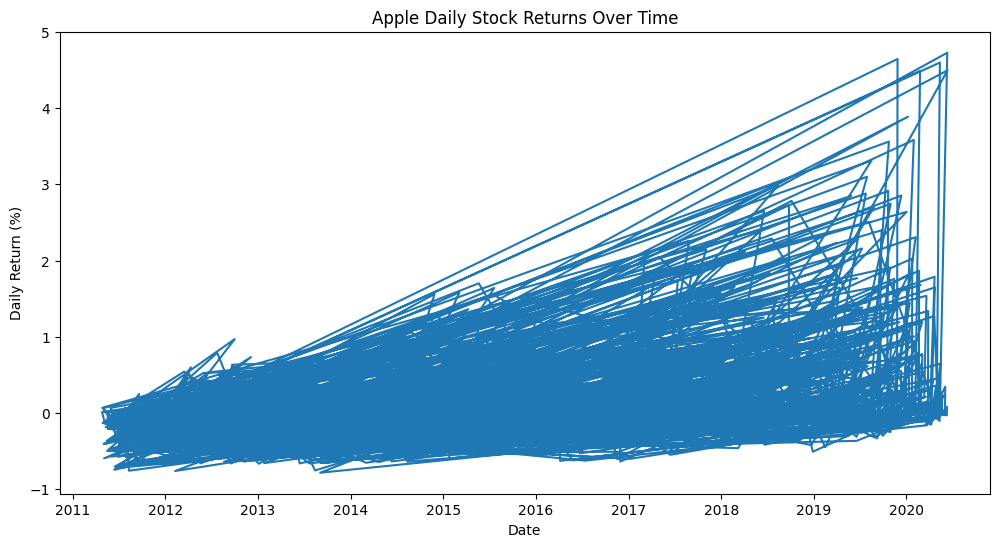

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(data_AAPL['Date'], data_AAPL['Daily_Return'])
plt.title('Apple Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

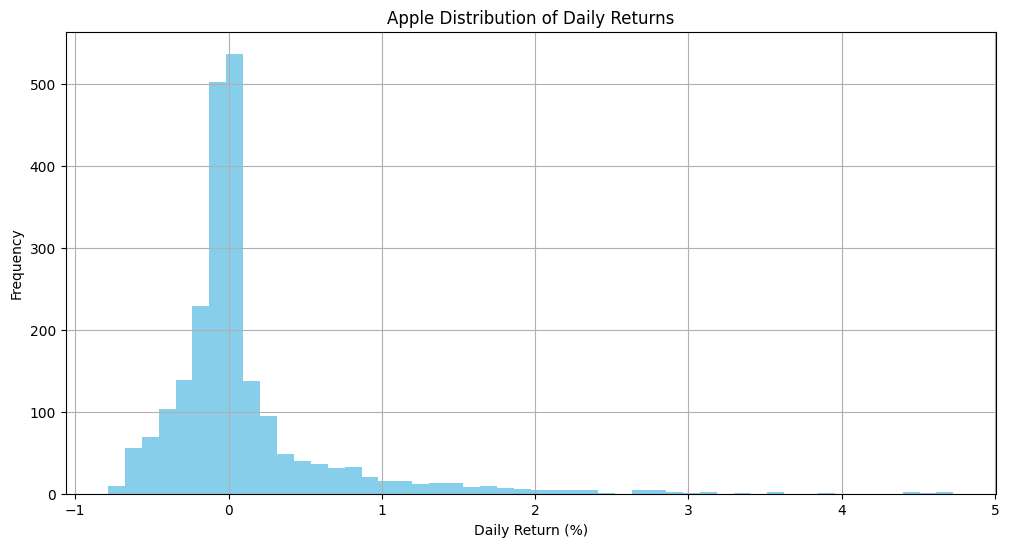

In [71]:
data_AAPL['Daily_Return'].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('Apple Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [72]:
mean_return = data_AAPL['Daily_Return'].mean()
std_return = data_AAPL['Daily_Return'].std()

print(f"Apple Average Daily Return: {mean_return:.4f}")
print(f"Apple Standard Deviation of Returns: {std_return:.4f}")

Apple Average Daily Return: 0.0935
Apple Standard Deviation of Returns: 0.5635


In [73]:
correlation_avg_sent_daily_return=data_AAPL["Daily_Return"].corr(data_AAPL["sentiment_Average"],method='pearson')
print(f"Pearson Correlation: {correlation_avg_sent_daily_return}")

Pearson Correlation: -0.03754576710931456


In [74]:
correlation_sent_daily_return=data_AAPL["Daily_Return"].corr(data_AAPL["sentiment"],method='pearson')
print(correlation_sent_daily_return)

0.014923769143244836


In [75]:
correlation_avg_sent_daily_return_spearman = data_AAPL['sentiment_Average'].corr(data_AAPL['Daily_Return'], method='spearman')
print(f"Spearman Correlation: {correlation_avg_sent_daily_return_spearman}")


Spearman Correlation: -0.03853952855438319


In [76]:
correlation_sent_daily_return_spearman = data_AAPL['sentiment'].corr(data_AAPL['Daily_Return'], method='spearman')
print(f"Spearman Correlation: {correlation_sent_daily_return_spearman}")


Spearman Correlation: 0.00032993162343512584


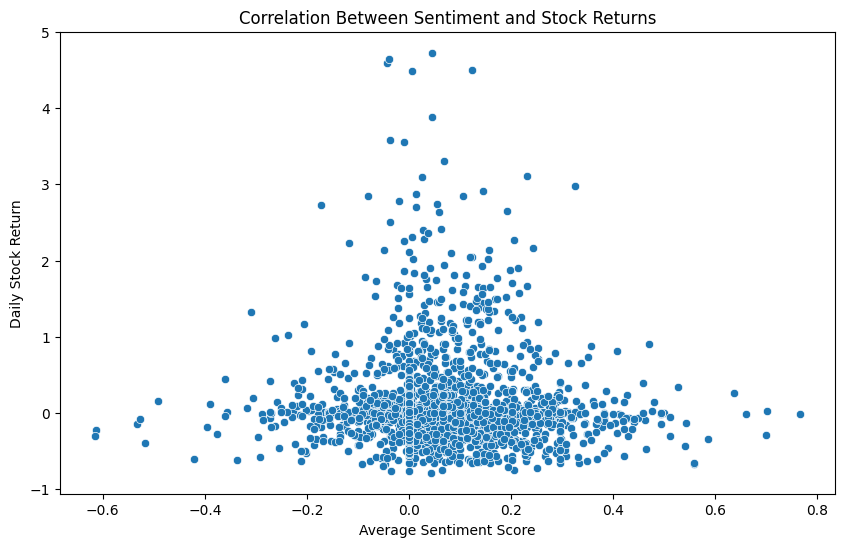

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_AAPL, x='sentiment_Average', y='Daily_Return')
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()

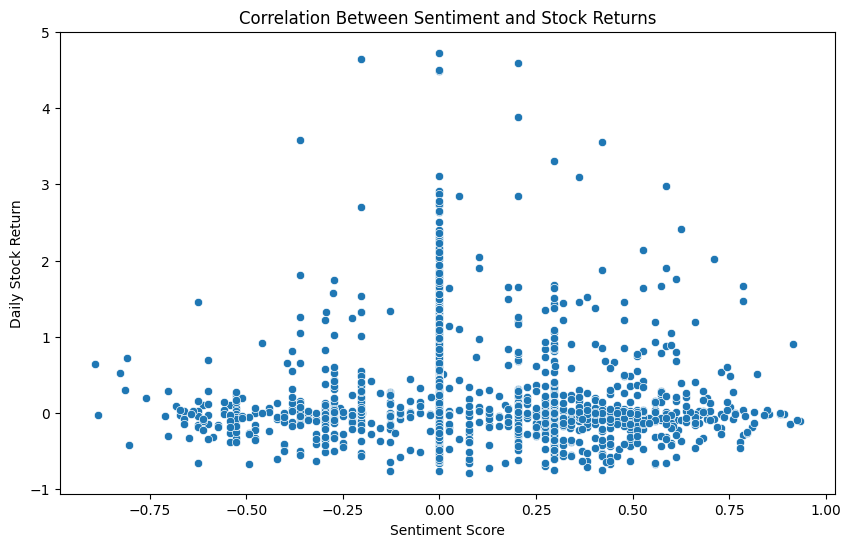

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_AAPL, x='sentiment', y='Daily_Return')
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()

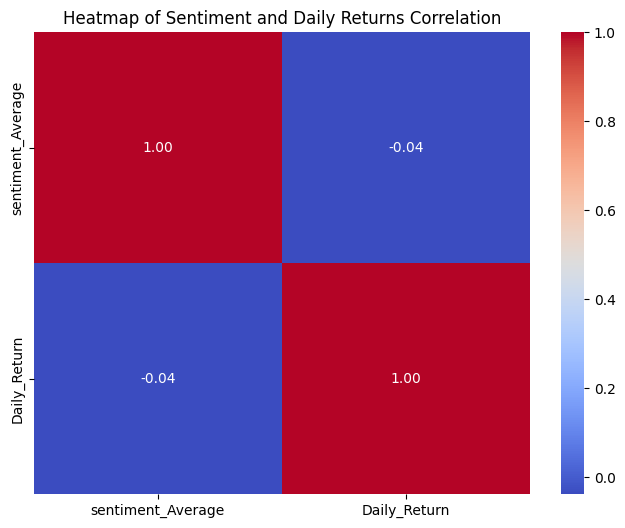

In [79]:
correlation_matrix = data_AAPL[['sentiment_Average', 'Daily_Return']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Sentiment and Daily Returns Correlation')
plt.show()

In [80]:
data2=pd.read_csv("./data/yfinance_data/AMZN_historical_data.csv")
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [81]:
data2.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [82]:
data2["Date"]=pd.to_datetime(data2["Date"],errors="coerce")
data2.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [83]:
data_AMZN=data_news.merge(data2[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],on="Date")
data_AMZN.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,123.400497,124.400002,123.058502,123.919998,123.919998,53420000,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,126.472000,131.321503,126.250000,130.042999,130.042999,103520000,0.0,0.0


In [84]:
data_AMZN.shape

(2226, 18)

In [85]:
data_AMZN["daily_return"]=data_AMZN["Close"].pct_change()
data_AMZN.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,123.400497,124.400002,123.058502,123.919998,123.919998,53420000,0.0,0.0,-0.001853
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,-0.022813
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.006202
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,126.472000,131.321503,126.250000,130.042999,130.042999,103520000,0.0,0.0,0.067291


In [86]:
data_AMZN["daily_return"]=data_AMZN["daily_return"].fillna(0)


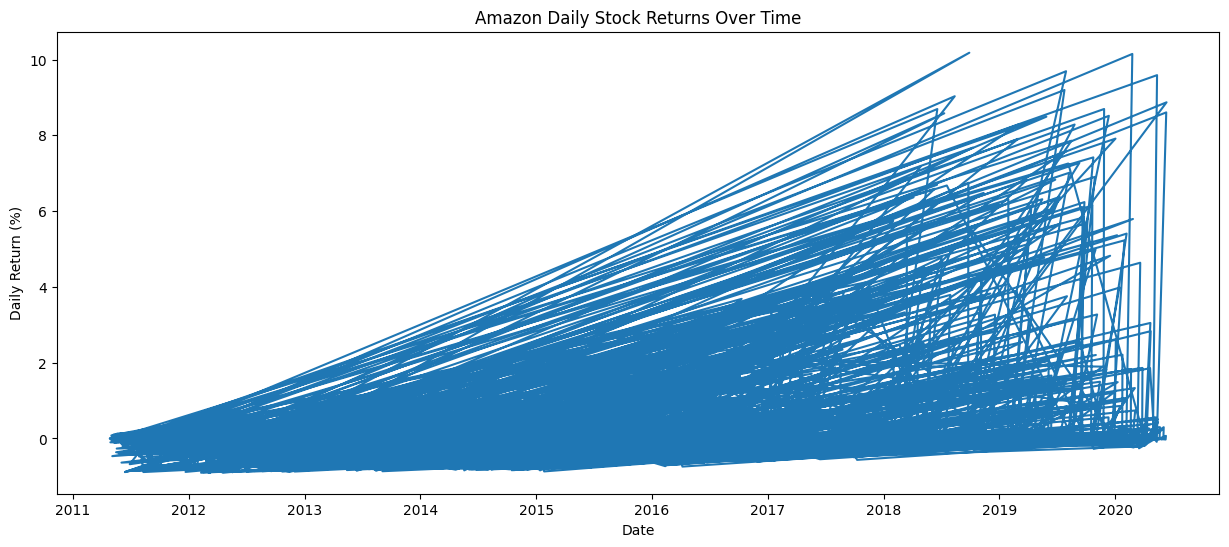

In [87]:
plt.figure(figsize=(15,6))
plt.plot(data_AMZN["Date"],data_AMZN["daily_return"])
plt.title('Amazon Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

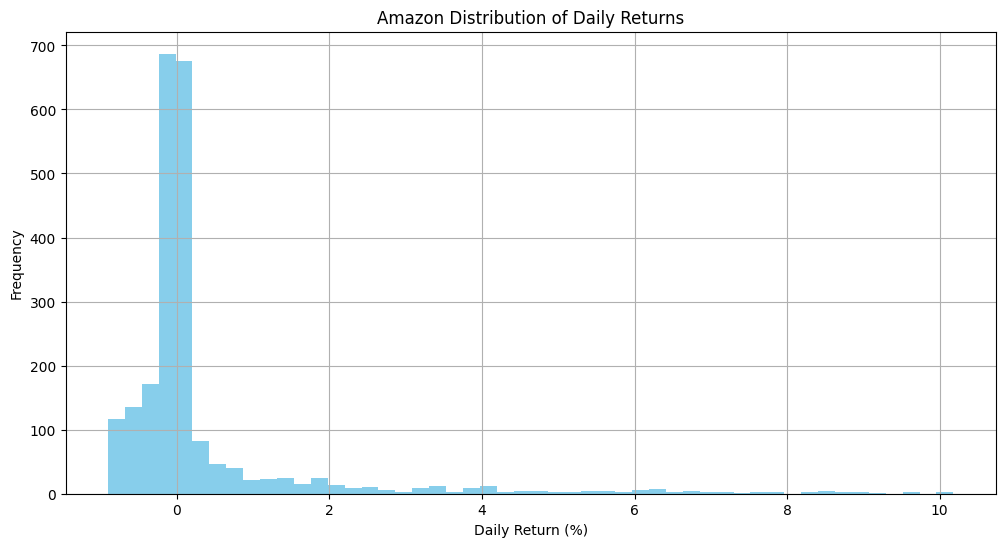

In [88]:
data_AMZN['daily_return'].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('Amazon Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [89]:
amazon_mean_daily_reaturn=data_AMZN["daily_return"].mean()
amazon_std_daily_reaturn=data_AMZN["daily_return"].std()
print(f"Amazon Mean Daily Return is {amazon_mean_daily_reaturn}")
print(f"Amazon Std Daily Return is {amazon_std_daily_reaturn}")

Amazon Mean Daily Return is 0.3244120119511145
Amazon Std Daily Return is 1.417024057136442


In [90]:
correlation_avg_sent_daily_return_Amazon=data_AMZN["sentiment_Average"].corr(data_AMZN["daily_return"], method="pearson")
print(f"Amazon the correlation between the avarage sentiment and Daily Return {correlation_avg_sent_daily_return_Amazon}")

Amazon the correlation between the avarage sentiment and Daily Return -0.011182760457150144


In [91]:
correlation_avg_sent_daily_return_Amazon_sp=data_AMZN["sentiment"].corr(data_AMZN["daily_return"], method="pearson")
print(f"Amazon the correlation between the sentiment and Daily Return {correlation_avg_sent_daily_return_Amazon}")

Amazon the correlation between the sentiment and Daily Return -0.011182760457150144


In [92]:
correlation_avg_sent_daily_return_Amazon_sp=data_AMZN["sentiment_Average"].corr(data_AMZN["daily_return"], method="spearman")
print(f"Amazon the correlation between the sentiment and Daily Return in  spearman{correlation_avg_sent_daily_return_Amazon_sp}")

Amazon the correlation between the sentiment and Daily Return in  spearman-0.036998003963410415


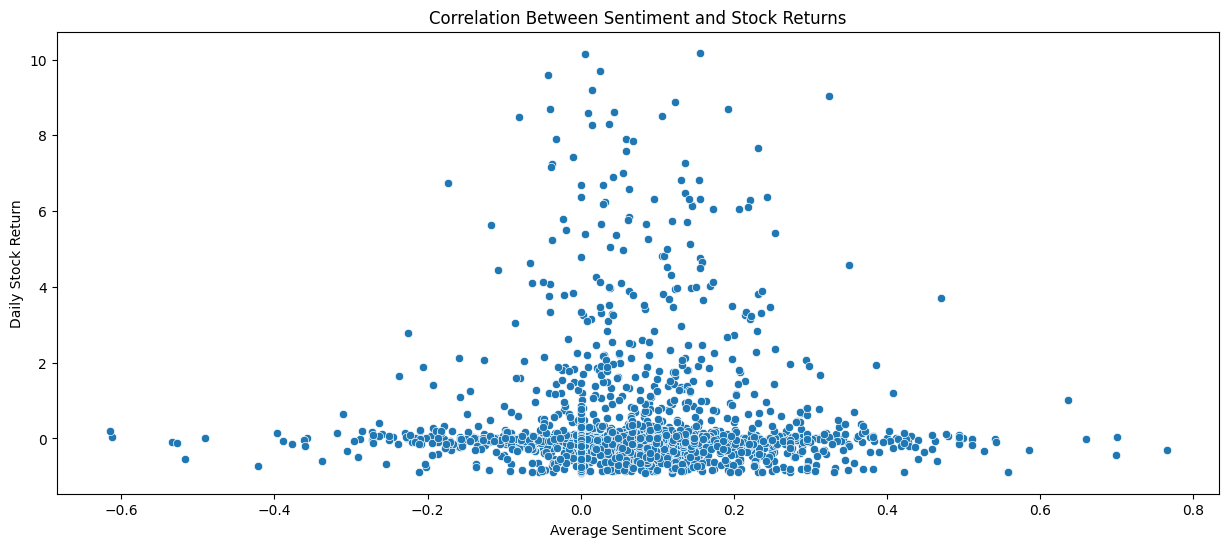

In [93]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data_AMZN,x="sentiment_Average",y="daily_return")
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()

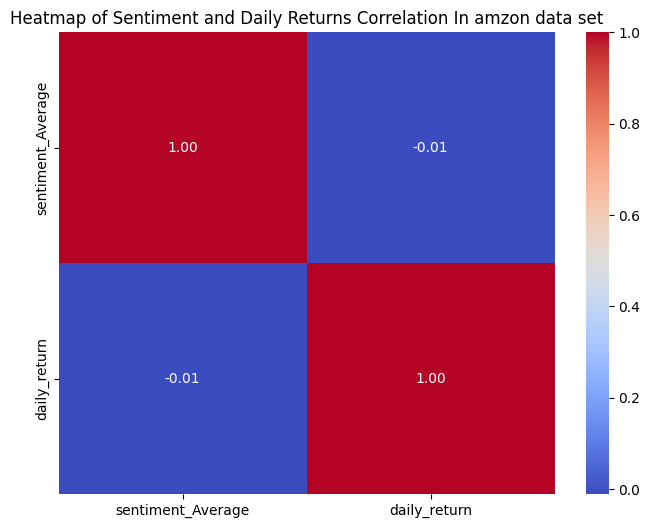

In [94]:
correlation_matrix_amzn = data_AMZN[['sentiment_Average', 'daily_return']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_amzn, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Sentiment and Daily Returns Correlation In amzon data set')
plt.show()

In [95]:
data3=pd.read_csv("./data/yfinance_data/GOOG_historical_data.csv")
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [96]:
data3.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [97]:
data3["Date"]=pd.to_datetime(data3["Date"],errors="coerce")
data3.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [98]:
data_GOOG=data_news.merge(data3[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],on="Date")
data_GOOG.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,71.915001,72.327599,71.488853,71.819000,71.737366,25124000,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,71.863503,72.050003,70.606499,70.850998,70.770462,41212000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,69.835503,70.638000,69.591499,70.521004,70.440842,26188000,0.0,0.0
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,72.267998,73.400002,72.160500,72.807999,72.725243,28184000,0.0,0.0


In [99]:
data_GOOG["daily_return"]=data_GOOG["Close"].pct_change()
data_GOOG.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,71.915001,72.327599,71.488853,71.819000,71.737366,25124000,0.0,0.0,-0.001397
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,71.863503,72.050003,70.606499,70.850998,70.770462,41212000,0.0,0.0,-0.013478
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,69.835503,70.638000,69.591499,70.521004,70.440842,26188000,0.0,0.0,-0.004658
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,72.267998,73.400002,72.160500,72.807999,72.725243,28184000,0.0,0.0,0.032430


In [100]:
data_GOOG["daily_return"]=data_GOOG["daily_return"].fillna(0)


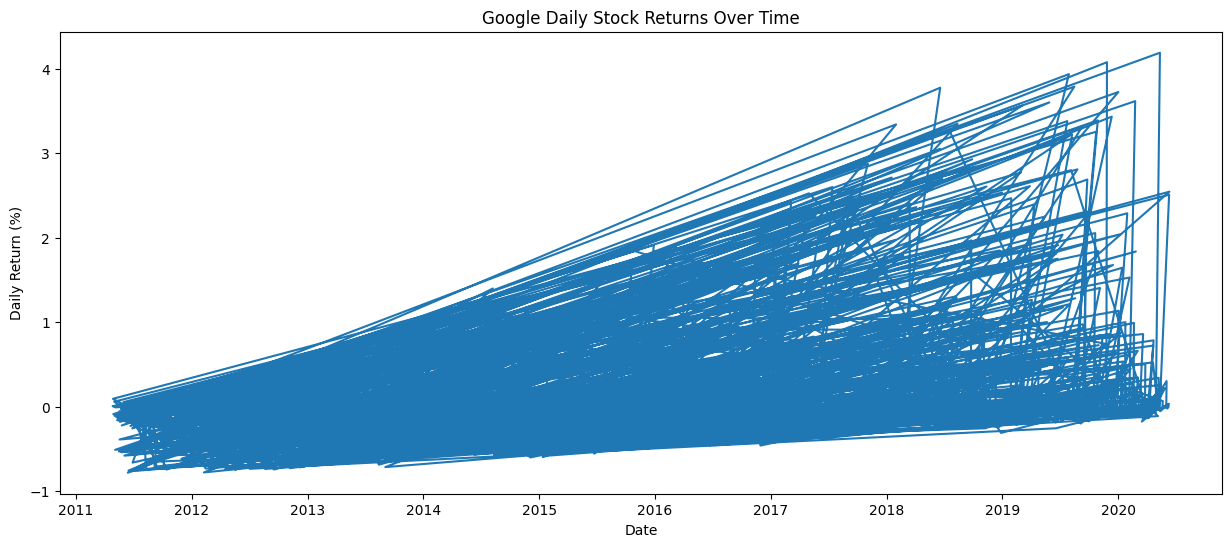

In [101]:
plt.figure(figsize=(15,6))
plt.plot(data_GOOG["Date"],data_GOOG["daily_return"])
plt.title('Google Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

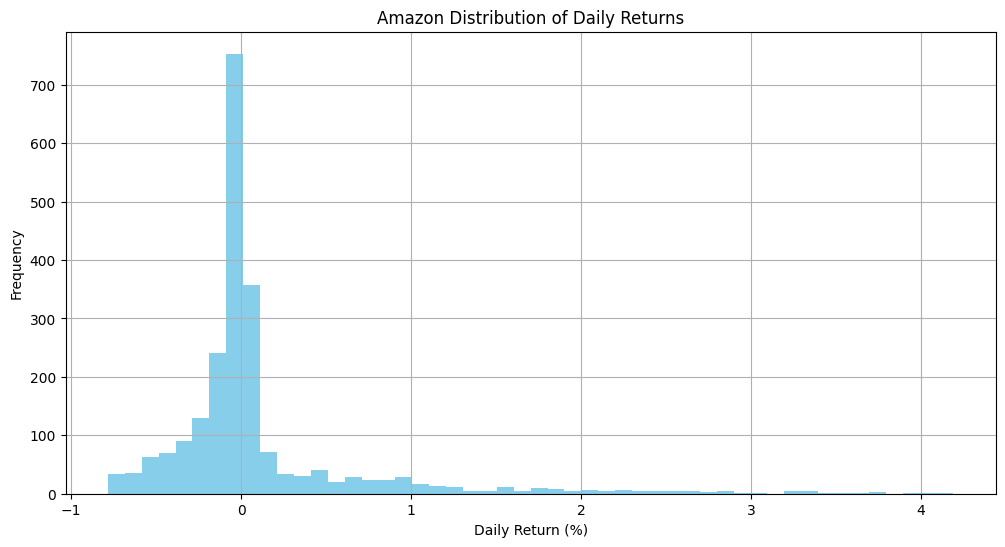

In [102]:
data_GOOG["daily_return"].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('Amazon Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [103]:
Google_mean_daily_reaturn=data_GOOG["daily_return"].mean()
Google_std_daily_reaturn=data_GOOG["daily_return"].std()
print(f"google daily return mean {Google_mean_daily_reaturn}")
print(f"google daily return Std {Google_std_daily_reaturn}")

google daily return mean 0.11009566353356132
google daily return Std 0.6218111837429946


In [104]:
google_correlation=data_GOOG["sentiment_Average"].corr(data_GOOG["daily_return"], method="pearson")
print(google_correlation)

-0.008593337811736454


In [105]:
google_correlation_sp=data_GOOG["sentiment_Average"].corr(data_GOOG["daily_return"], method="spearman")
print(google_correlation_sp)

-0.019033872302007624


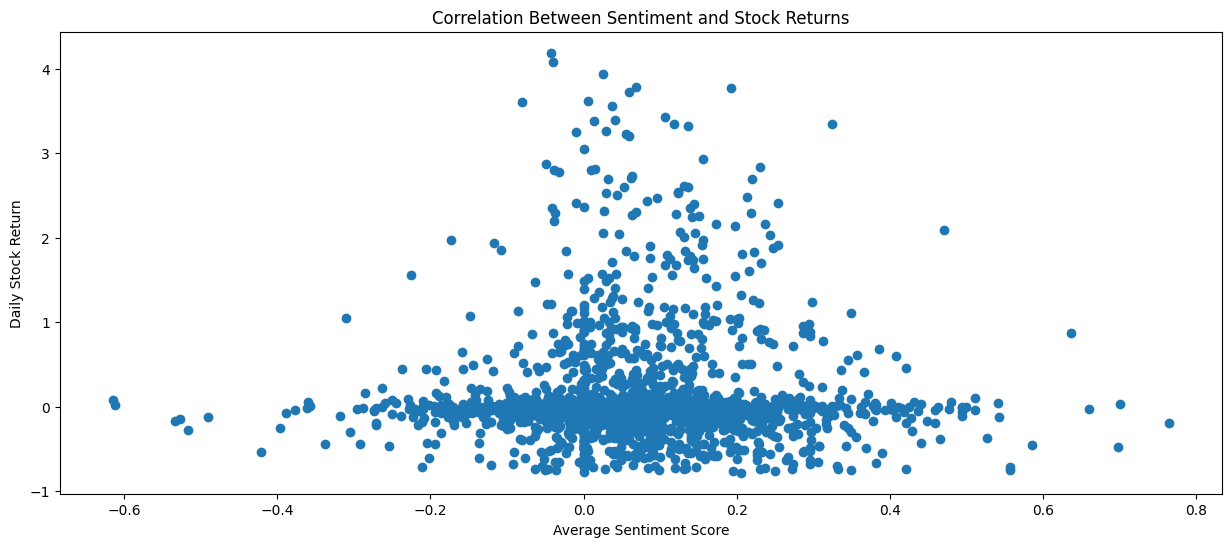

In [106]:
plt.figure(figsize=(15,6))
plt.scatter(data=data_GOOG,x="sentiment_Average",y="daily_return")
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


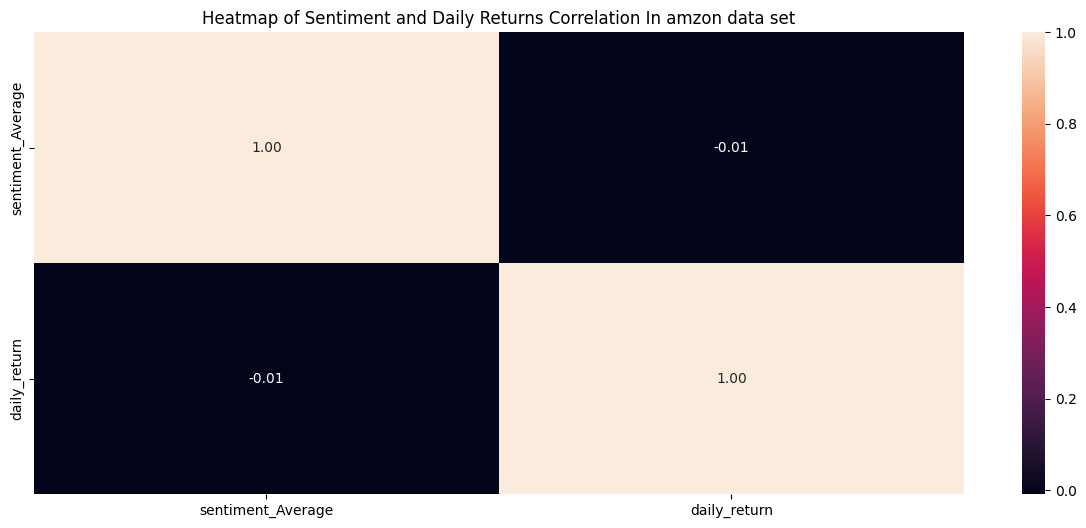

In [107]:
corre_google=data_GOOG[["sentiment_Average","daily_return"]].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corre_google,annot=True,fmt=".2f")
plt.title('Heatmap of Sentiment and Daily Returns Correlation In amzon data set')
plt.show()

In [108]:
data4=pd.read_csv("./data/yfinance_data/META_historical_data.csv")
data4.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [109]:
data4["Date"]=pd.to_datetime(data4["Date"],errors="coerce")
data4.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [110]:
data_META=data_news.merge(data4[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],on="Date")
data_META.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,232.110001,232.649994,228.529999,230.160004,229.688019,15380300,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,239.770004,240.899994,231.669998,232.199997,231.723816,33178300,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,231.509995,235.990005,228.740005,234.910004,234.428268,33925600,0.0,0.0
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,231.520004,239.770004,230.410004,238.669998,238.180557,27462900,0.0,0.0


In [111]:
data_META["daily_return"]=data_META["Close"].pct_change()
data_META.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,232.110001,232.649994,228.529999,230.160004,229.688019,15380300,0.0,0.0,-0.002643
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,239.770004,240.899994,231.669998,232.199997,231.723816,33178300,0.0,0.0,0.008863
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,231.509995,235.990005,228.740005,234.910004,234.428268,33925600,0.0,0.0,0.011671
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,231.520004,239.770004,230.410004,238.669998,238.180557,27462900,0.0,0.0,0.016006


In [112]:
data_META["daily_return"]=data_META["daily_return"].fillna(0)


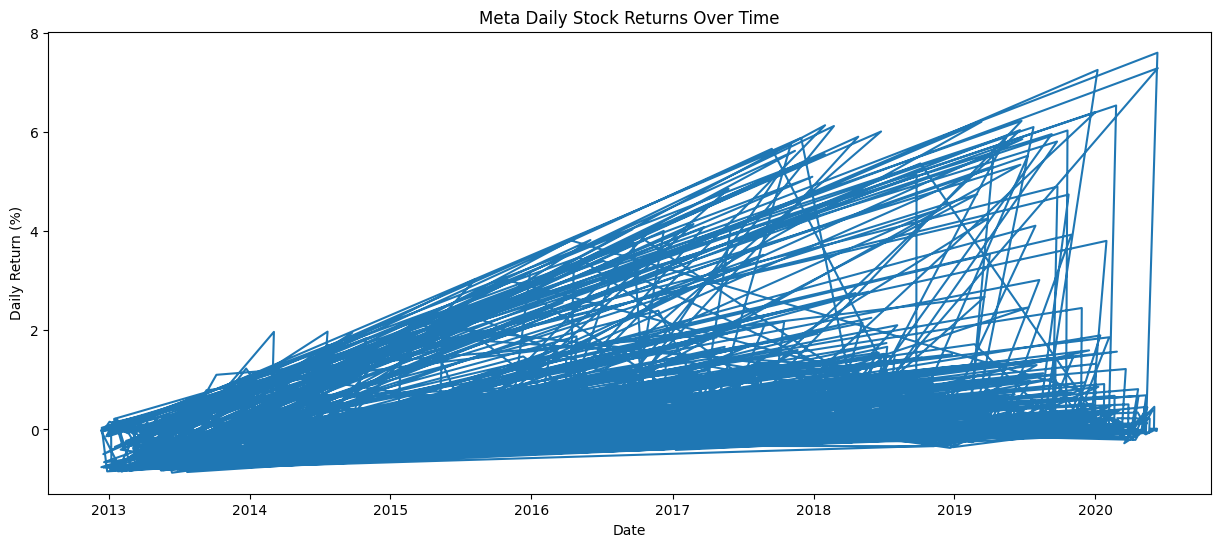

In [113]:
plt.figure(figsize=(15,6))
plt.plot(data_META["Date"],data_META["daily_return"])
plt.title('Meta Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

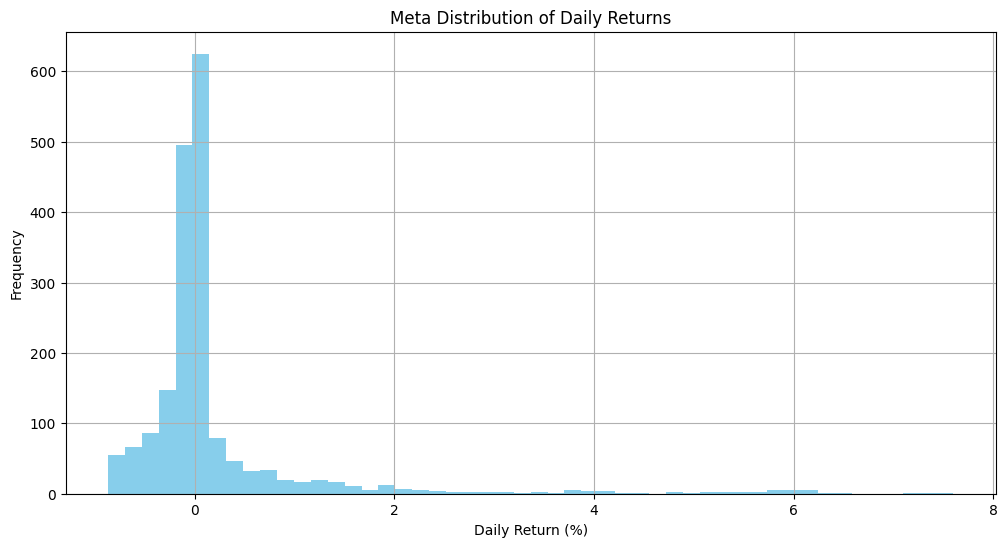

In [114]:
data_META["daily_return"].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('Meta Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [115]:
meta_mean_daily_reaturn=data_META["daily_return"].mean()
meta_std_daily_reaturn=data_META["daily_return"].std()
print(f"meta daily return mean {meta_mean_daily_reaturn}")
print(f"meta daily return Std {meta_std_daily_reaturn}")

meta daily return mean 0.19704134022428466
meta daily return Std 1.0167713241081717


In [116]:
meta_correlation=data_META["sentiment_Average"].corr(data_META["daily_return"], method="pearson")
print(meta_correlation)

0.009331254637222546


In [117]:
meta_correlation_sp=data_META["sentiment_Average"].corr(data_META["daily_return"], method="spearman")
print(meta_correlation_sp)

0.001375096844350519


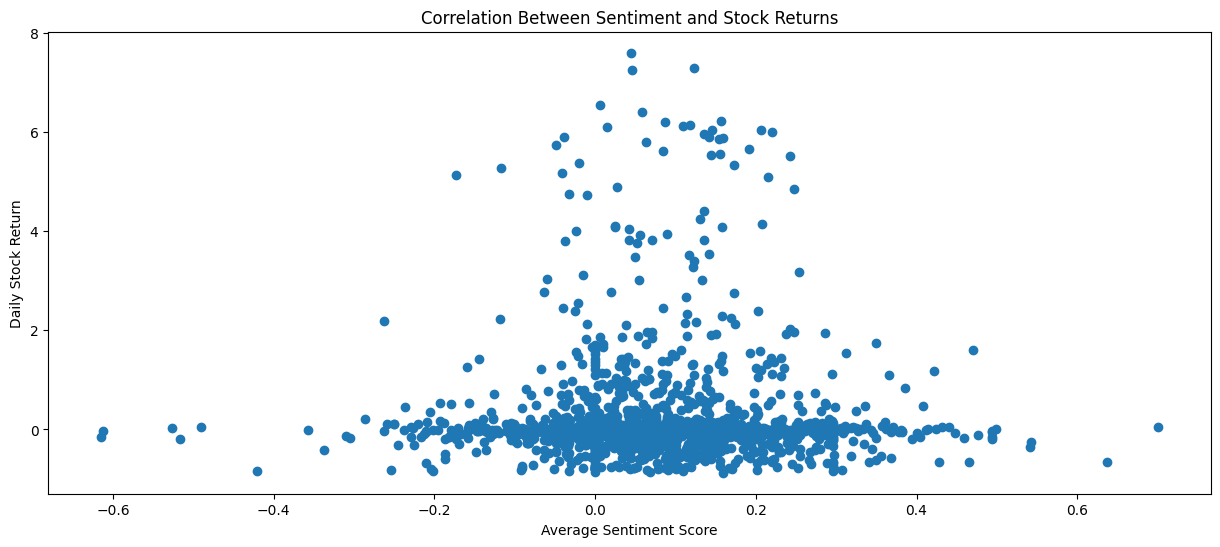

In [118]:
plt.figure(figsize=(15,6))
plt.scatter(data=data_META,x="sentiment_Average",y="daily_return")
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


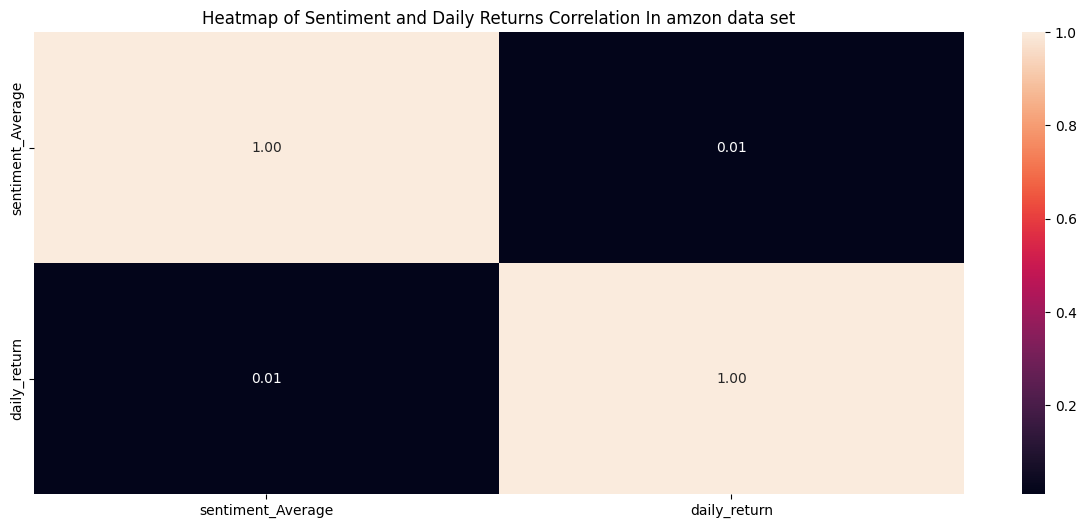

In [119]:
corre_meta=data_META[["sentiment_Average","daily_return"]].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corre_meta,annot=True,fmt=".2f")
plt.title('Heatmap of Sentiment and Daily Returns Correlation In amzon data set')
plt.show()

In [120]:
data5=pd.read_csv("./data/yfinance_data/MSFT_historical_data.csv")
data5.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [121]:
data5["Date"]=pd.to_datetime(data5["Date"],errors="coerce")
data5.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [122]:
data_MSFT=data_news.merge(data5[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],on="Date")
data_MSFT.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,184.820007,185.940002,183.580002,185.360001,178.630417,27311000,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,186.339996,186.500000,181.100006,181.570007,174.977966,36073600,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,183.190002,184.460007,182.539993,183.509995,176.847519,20826900,0.0,0.0
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,188.000000,190.699997,187.259995,189.800003,182.909195,29783900,0.0,0.0


In [123]:
data_MSFT["daily_return"]=data_MSFT["Close"].pct_change()
data_MSFT.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,184.820007,185.940002,183.580002,185.360001,178.630417,27311000,0.0,0.0,-0.009829
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,186.339996,186.500000,181.100006,181.570007,174.977966,36073600,0.0,0.0,-0.020447
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,183.190002,184.460007,182.539993,183.509995,176.847519,20826900,0.0,0.0,0.010685
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,188.000000,190.699997,187.259995,189.800003,182.909195,29783900,0.0,0.0,0.034276


In [124]:
data_MSFT["daily_return"]=data_MSFT["daily_return"].fillna(0)


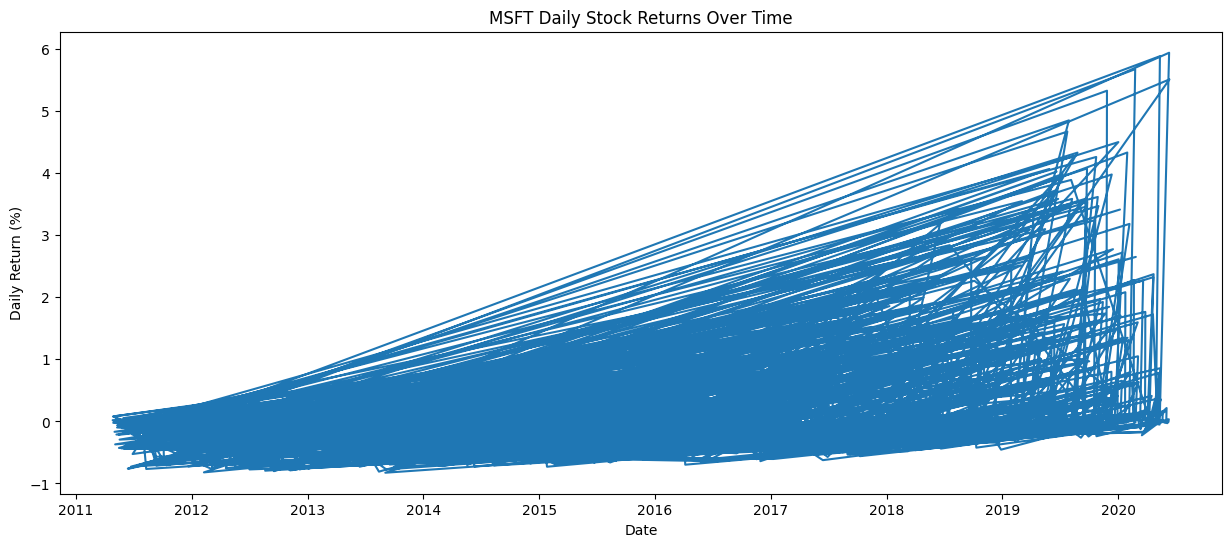

In [125]:
plt.figure(figsize=(15,6))
plt.plot(data_MSFT["Date"],data_MSFT["daily_return"])
plt.title('MSFT Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

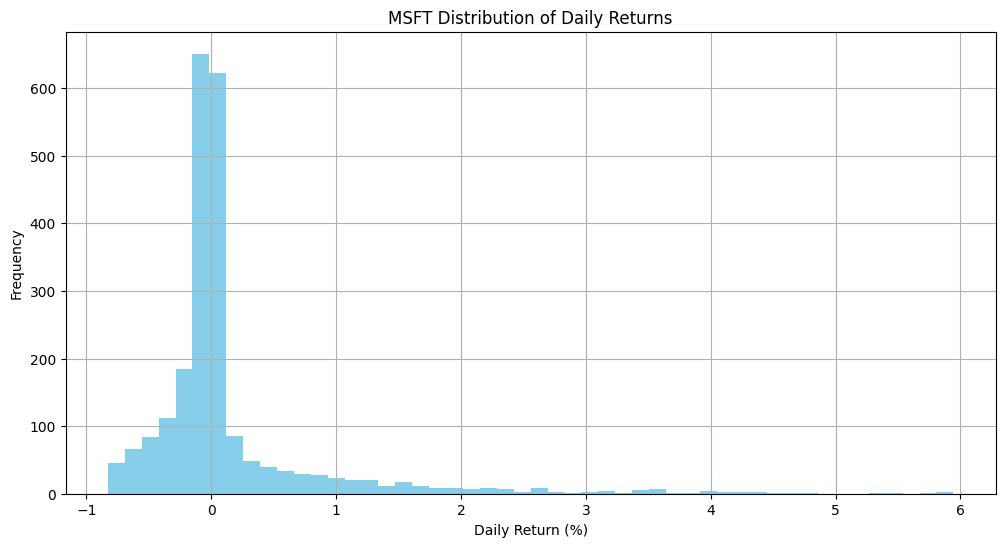

In [126]:
data_MSFT["daily_return"].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('MSFT Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [127]:
MSFT_mean_daily_reaturn=data_MSFT["daily_return"].mean()
MSFT_std_daily_reaturn=data_MSFT["daily_return"].std()
print(f"micro soft daily return mean {MSFT_mean_daily_reaturn}")
print(f"micro soft daily return Std {MSFT_std_daily_reaturn}")

micro soft daily return mean 0.13755256856923148
micro soft daily return Std 0.7443484475659508


In [128]:
MSFT_correlation=data_MSFT["sentiment_Average"].corr(data_MSFT["daily_return"], method="pearson")
print(MSFT_correlation)

-0.02369786061436833


In [129]:
MSFT_correlation_sp=data_MSFT["sentiment_Average"].corr(data_MSFT["daily_return"], method="spearman")
print(MSFT_correlation_sp)

-0.03462000340063693


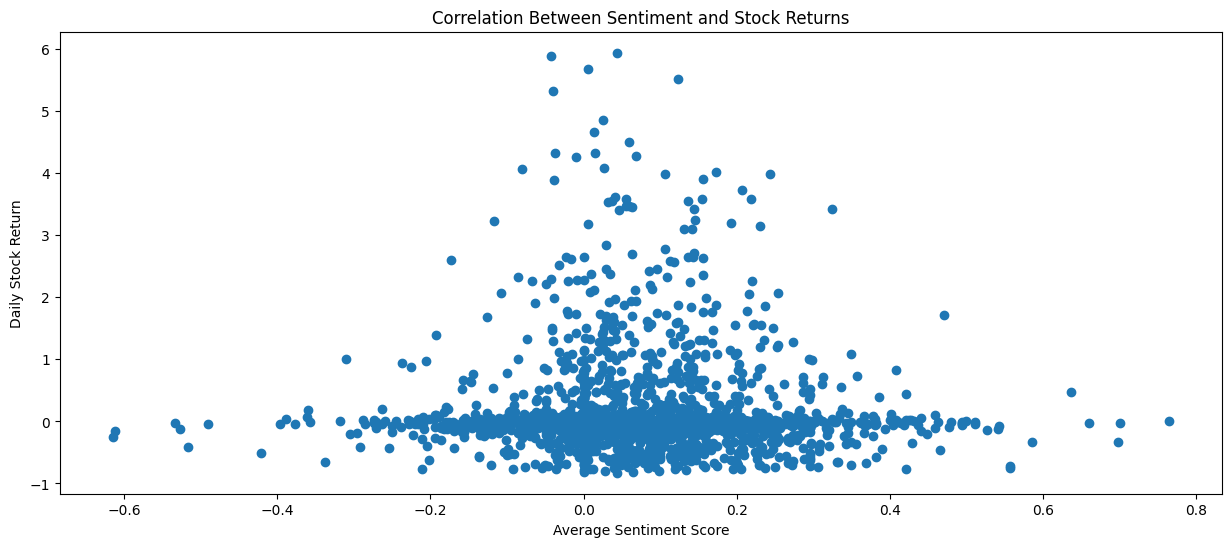

In [130]:
plt.figure(figsize=(15,6))
plt.scatter(data=data_MSFT,x="sentiment_Average",y="daily_return")
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


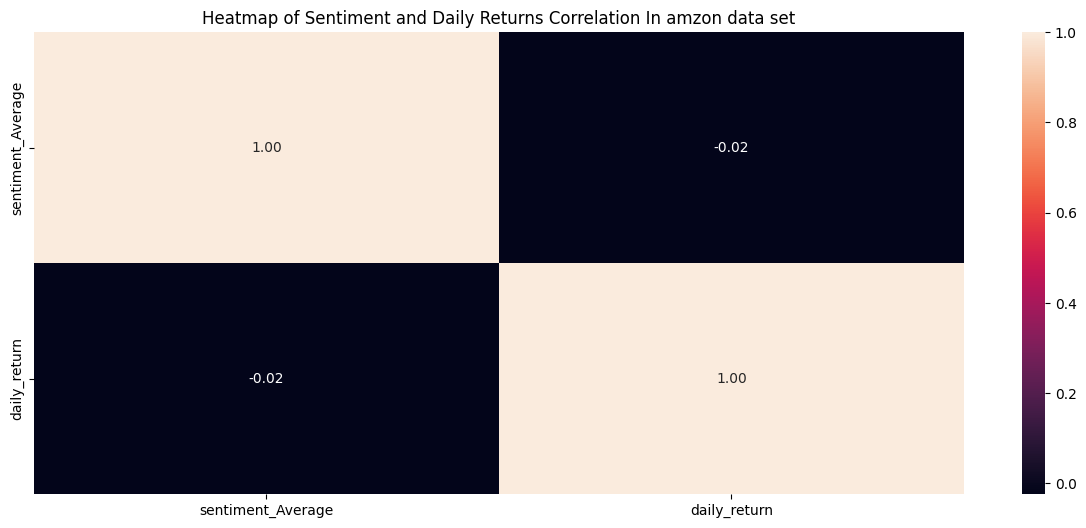

In [131]:
corre_MSFT=data_MSFT[["sentiment_Average","daily_return"]].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corre_MSFT,annot=True,fmt=".2f")
plt.title('Heatmap of Sentiment and Daily Returns Correlation In amzon data set')
plt.show()

In [132]:
data6=pd.read_csv("./data/yfinance_data/NVDA_historical_data.csv")
data6.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [133]:
data6["Date"]=pd.to_datetime(data6["Date"],errors="coerce")
data6.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [134]:
data_NAVD=data_news.merge(data6[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],on="Date")
data_NAVD.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,8.79450,8.99700,8.70800,8.92000,8.893502,481748000,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,8.82225,8.86625,8.70000,8.76950,8.739462,365440000,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,9.15675,9.18175,8.67200,8.71775,8.687888,770780000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,8.82525,9.09300,8.71325,9.02625,8.995332,1038764000,0.0,0.0
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,0.0,0.0


In [135]:
data_NAVD["daily_return"]=data_NAVD["Close"].pct_change()
data_NAVD.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,8.79450,8.99700,8.70800,8.92000,8.893502,481748000,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,8.82225,8.86625,8.70000,8.76950,8.739462,365440000,0.0,0.0,-0.016872
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,9.15675,9.18175,8.67200,8.71775,8.687888,770780000,0.0,0.0,-0.005901
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,8.82525,9.09300,8.71325,9.02625,8.995332,1038764000,0.0,0.0,0.035388
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,0.0,0.0,0.002188


In [136]:
data_NAVD["daily_return"]=data_NAVD["daily_return"].fillna(0)


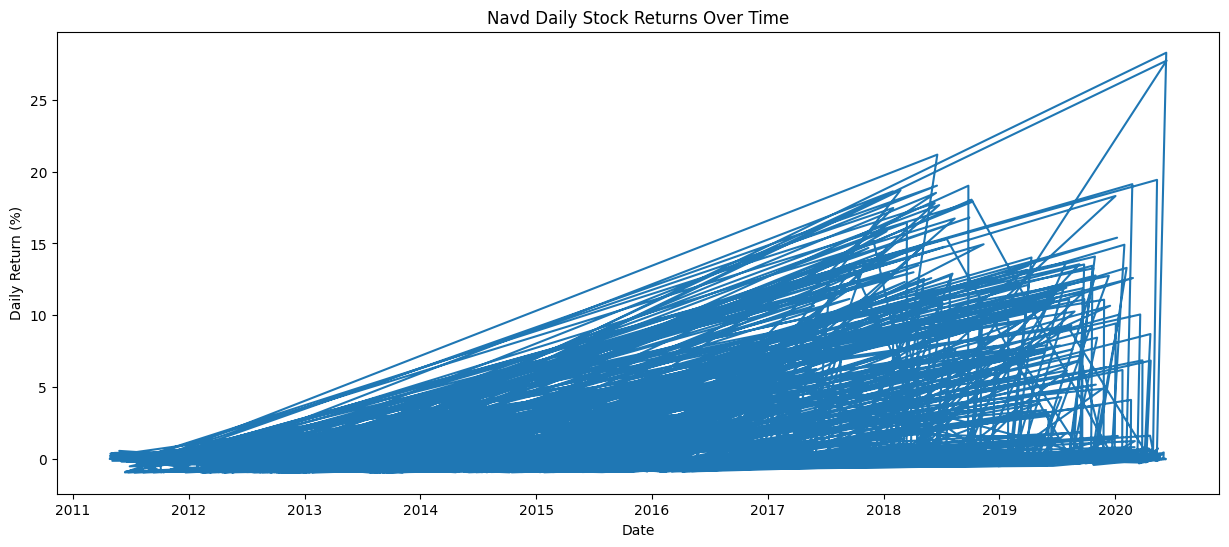

In [137]:
plt.figure(figsize=(15,6))
plt.plot(data_NAVD["Date"],data_NAVD["daily_return"])
plt.title('Navd Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

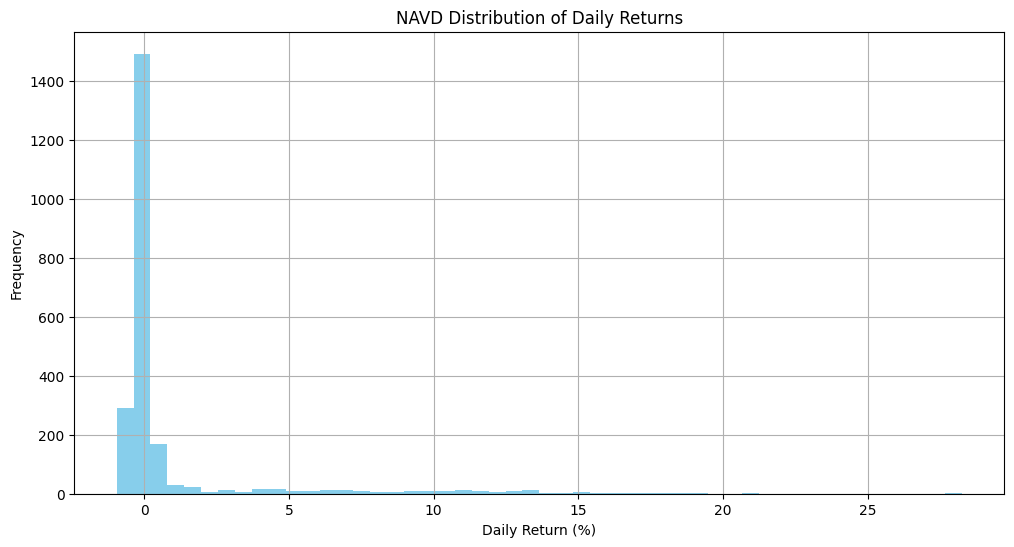

In [138]:
data_NAVD["daily_return"].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('NAVD Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [139]:
NAVD_mean_daily_reaturn=data_NAVD["daily_return"].mean()
NAVD_std_daily_reaturn=data_NAVD["daily_return"].std()
print(f"NAVD daily return mean {NAVD_mean_daily_reaturn}")
print(f"NAVD daily return Std {NAVD_std_daily_reaturn}")

NAVD daily return mean 0.8335984131133449
NAVD daily return Std 3.175619647283569


In [140]:
NAVD_correlation=data_NAVD["sentiment_Average"].corr(data_NAVD["daily_return"], method="pearson")
print(NAVD_correlation)

0.008460683628722323


In [141]:
NAVD_correlation_sp=data_NAVD["sentiment_Average"].corr(data_NAVD["daily_return"], method="spearman")
print(NAVD_correlation_sp)

-0.021341538545799177


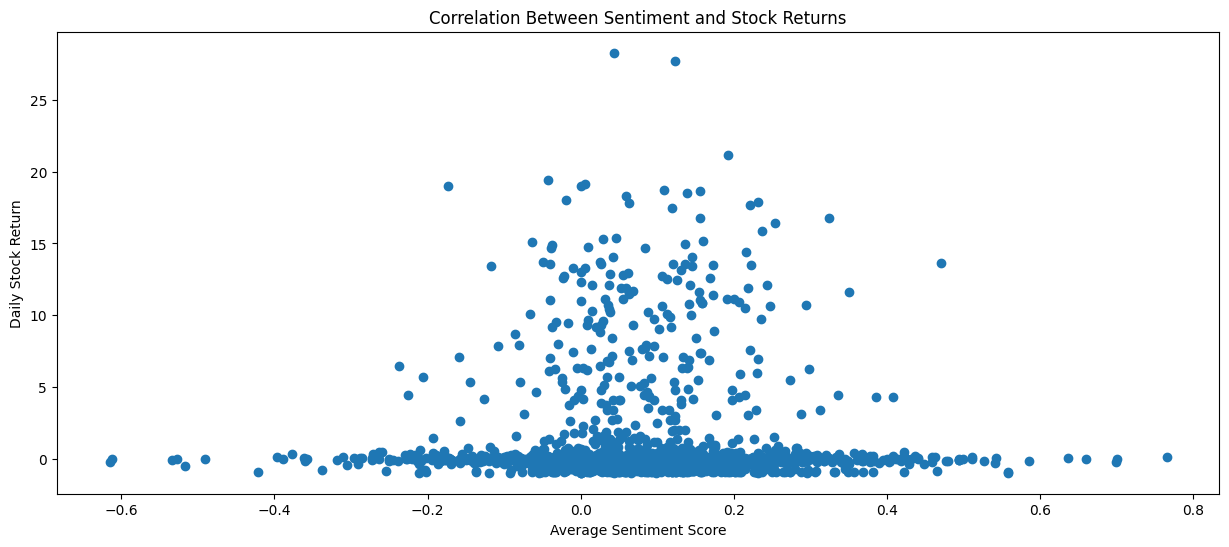

In [142]:
plt.figure(figsize=(15,6))
plt.scatter(data=data_NAVD,x="sentiment_Average",y="daily_return")
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


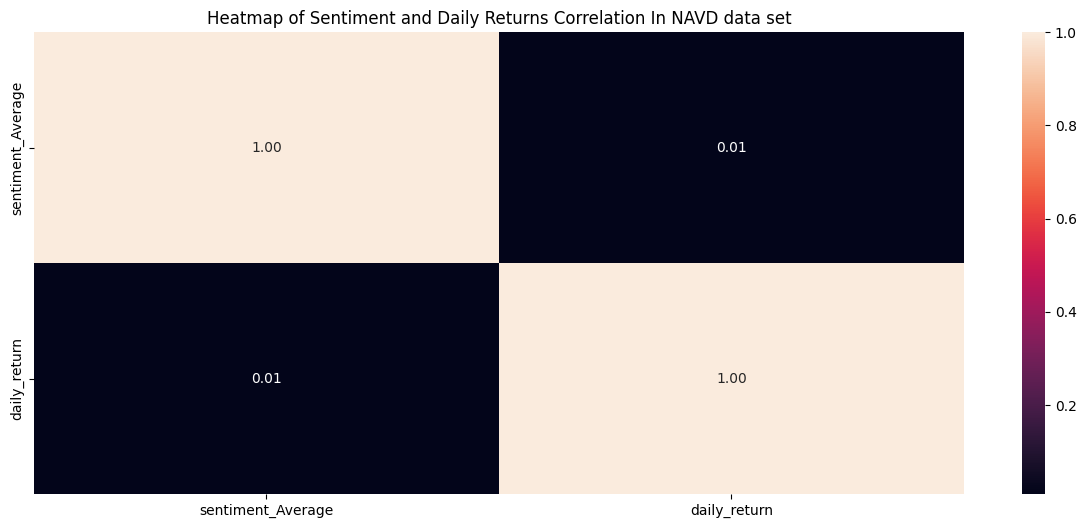

In [143]:
corre_NAVD=data_NAVD[["sentiment_Average","daily_return"]].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corre_NAVD,annot=True,fmt=".2f")
plt.title('Heatmap of Sentiment and Daily Returns Correlation In NAVD data set')
plt.show()

In [144]:
data7=pd.read_csv("./data/yfinance_data/TSLA_historical_data.csv")
data7.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [145]:
data7["Date"]=pd.to_datetime(data7["Date"],errors="coerce")
data7.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [146]:
data_TSLA=data_news.merge(data7[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],on="Date")
data_TSLA.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,58.522667,59.101334,57.746666,59.043999,59.043999,117178500,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,59.208000,59.862667,58.673332,58.863998,58.863998,119242500,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,55.633331,55.639999,54.380669,54.591331,54.591331,121345500,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,54.811333,55.452000,54.133331,54.458668,54.458668,149812500,0.0,0.0
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,62.667332,63.629333,61.595333,62.711334,62.711334,170823000,0.0,0.0


In [147]:
data_TSLA["daily_return"]=data_TSLA["Close"].pct_change()
data_TSLA.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.0000,nutral,0.498827,58.522667,59.101334,57.746666,59.043999,59.043999,117178500,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.0000,nutral,0.411173,59.208000,59.862667,58.673332,58.863998,58.863998,119242500,0.0,0.0,-0.003049
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.0000,nutral,0.414618,55.633331,55.639999,54.380669,54.591331,54.591331,121345500,0.0,0.0,-0.072585
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.0000,nutral,0.032172,54.811333,55.452000,54.133331,54.458668,54.458668,149812500,0.0,0.0,-0.002430
4,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA,2020-06-09,0.7506,postive,0.283041,62.667332,63.629333,61.595333,62.711334,62.711334,170823000,0.0,0.0,0.151540


In [148]:
data_TSLA["daily_return"]=data_TSLA["daily_return"].fillna(0)


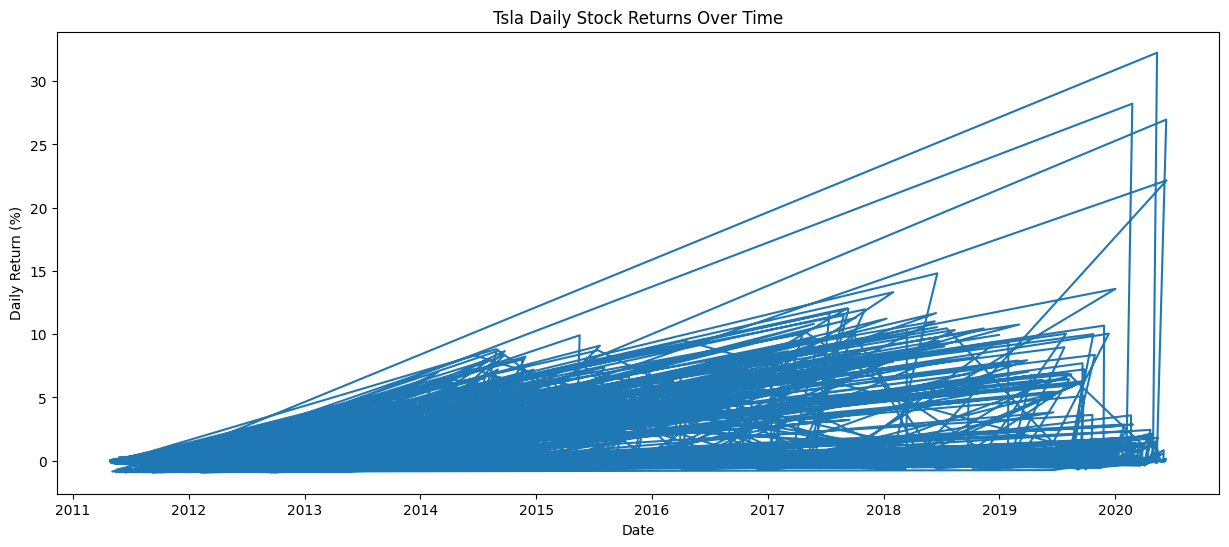

In [149]:
plt.figure(figsize=(15,6))
plt.plot(data_TSLA["Date"],data_TSLA["daily_return"])
plt.title('Tsla Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

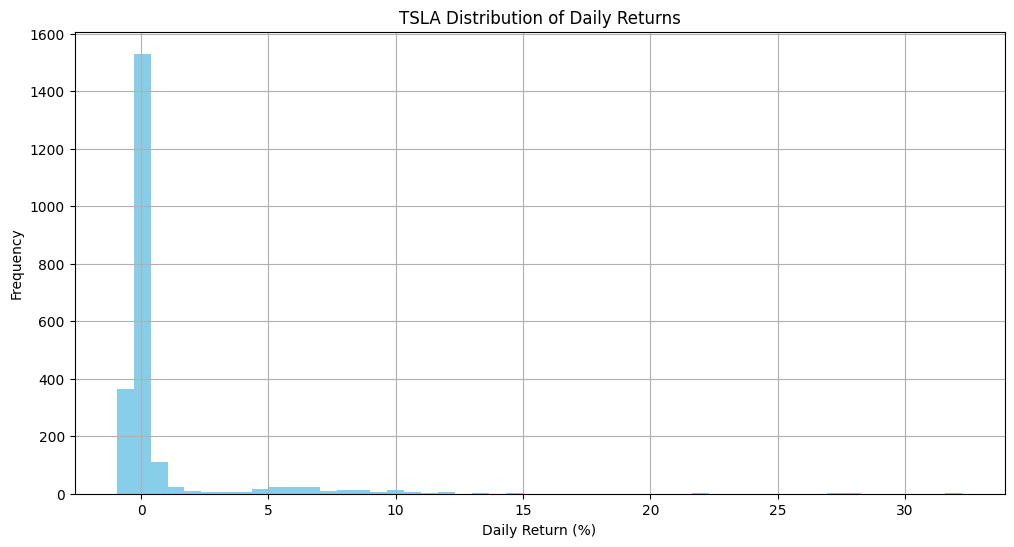

In [150]:
data_TSLA["daily_return"].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('TSLA Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [151]:
TSLA_mean_daily_reaturn=data_TSLA["daily_return"].mean()
TSLA_std_daily_reaturn=data_TSLA["daily_return"].std()
print(f"TSLA daily return mean {TSLA_mean_daily_reaturn}")
print(f"TSLA daily return Std {TSLA_std_daily_reaturn}")

TSLA daily return mean 0.5663365603503562
TSLA daily return Std 2.378993320827637


In [152]:
TSLA_correlation=data_TSLA["sentiment_Average"].corr(data_TSLA["daily_return"], method="pearson")
print(TSLA_correlation)

0.015575052761811972


In [153]:
TSLA_correlation_sp=data_TSLA["sentiment_Average"].corr(data_TSLA["daily_return"], method="spearman")
print(TSLA_correlation_sp)

-0.008655484982833991


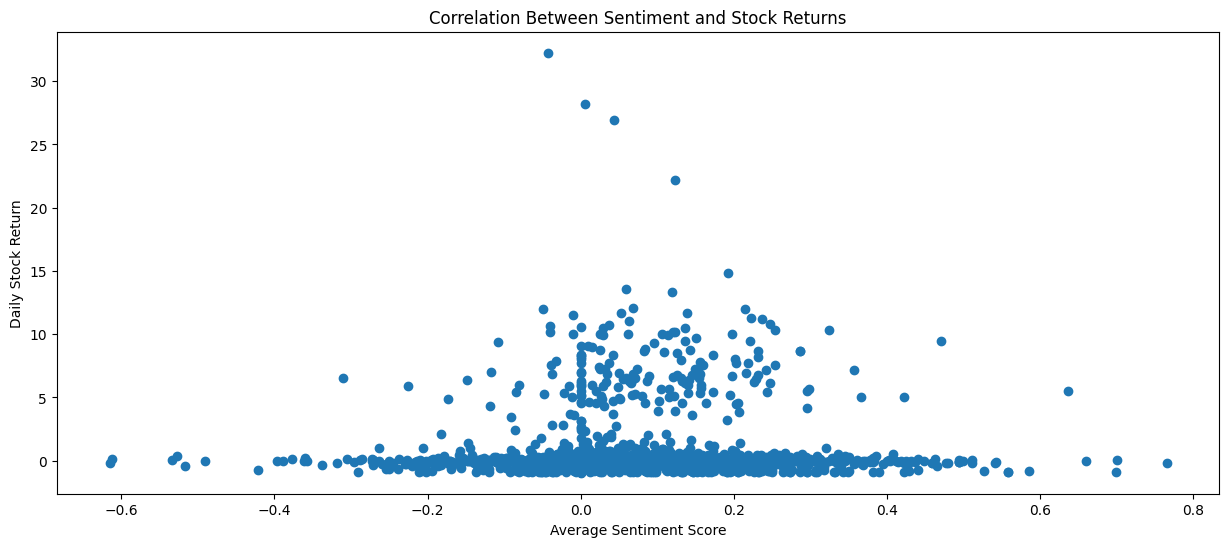

In [154]:
plt.figure(figsize=(15,6))
plt.scatter(data=data_TSLA,x="sentiment_Average",y="daily_return")
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


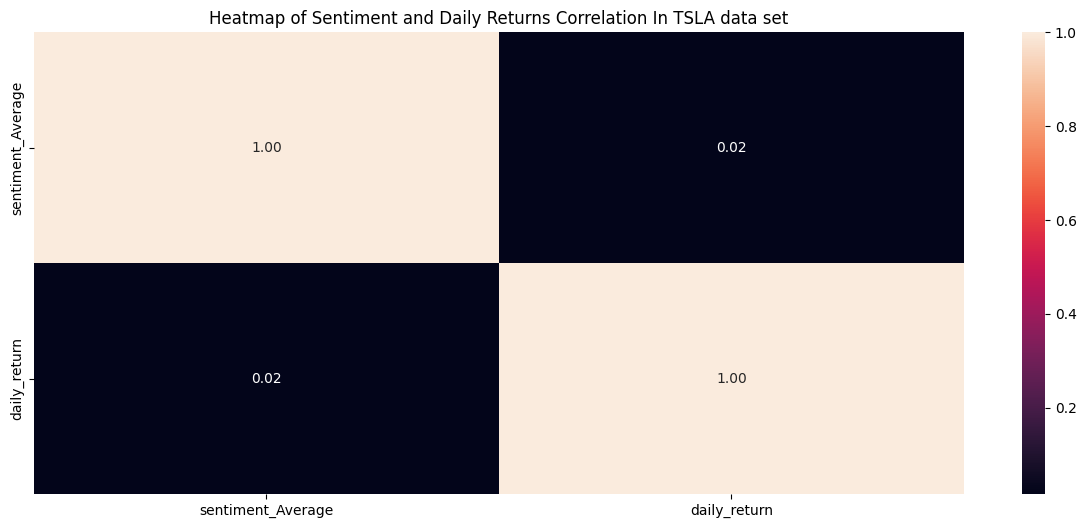

In [155]:
corre_TSLA=data_TSLA[["sentiment_Average","daily_return"]].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corre_TSLA,annot=True,fmt=".2f")
plt.title('Heatmap of Sentiment and Daily Returns Correlation In TSLA data set')
plt.show()